In [1]:
using AlgebraicPetri
using Catlab.Graphs.BasicGraphs
using Catlab.CategoricalAlgebra

include("ModelStratify.jl");

## Define Epidemiology Model

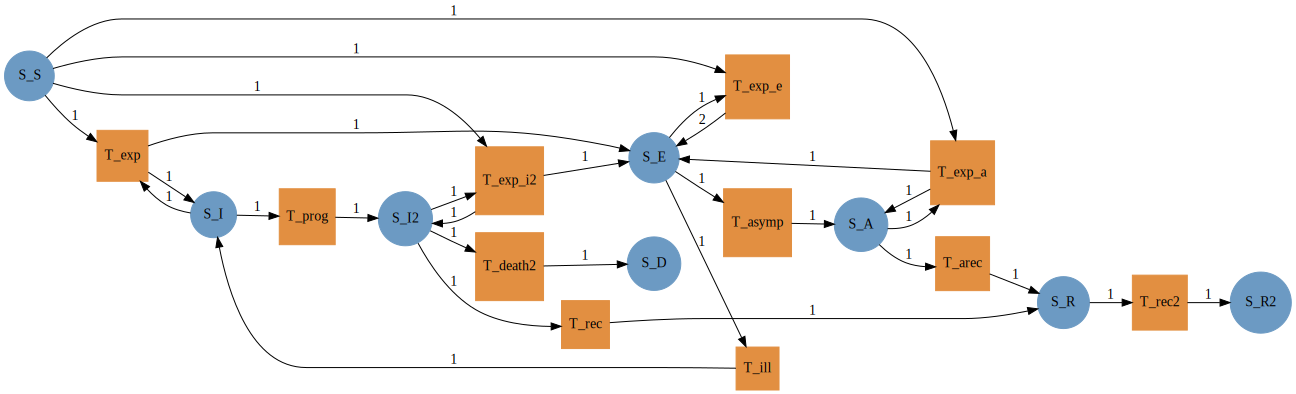

In [2]:
# Read in json string
model_json = open(f->read(f, String), "models/seiard.json");
# Parse json to object
model = ModelStratify.deserialize(model_json, LabelledPetriNet);
# Graph initial model
AlgebraicPetri.Graph(model)

## Define Connection Graph

In [3]:
# Read in json string
conn_json = open(f->read(f, String), "connection_graphs/chain_3.json");
# Parse json to object
conn_graph = ModelStratify.deserialize(conn_json, BasicGraphs.Graph);
ModelStratify.show_graph(conn_graph)

## Perform Demographic Stratification

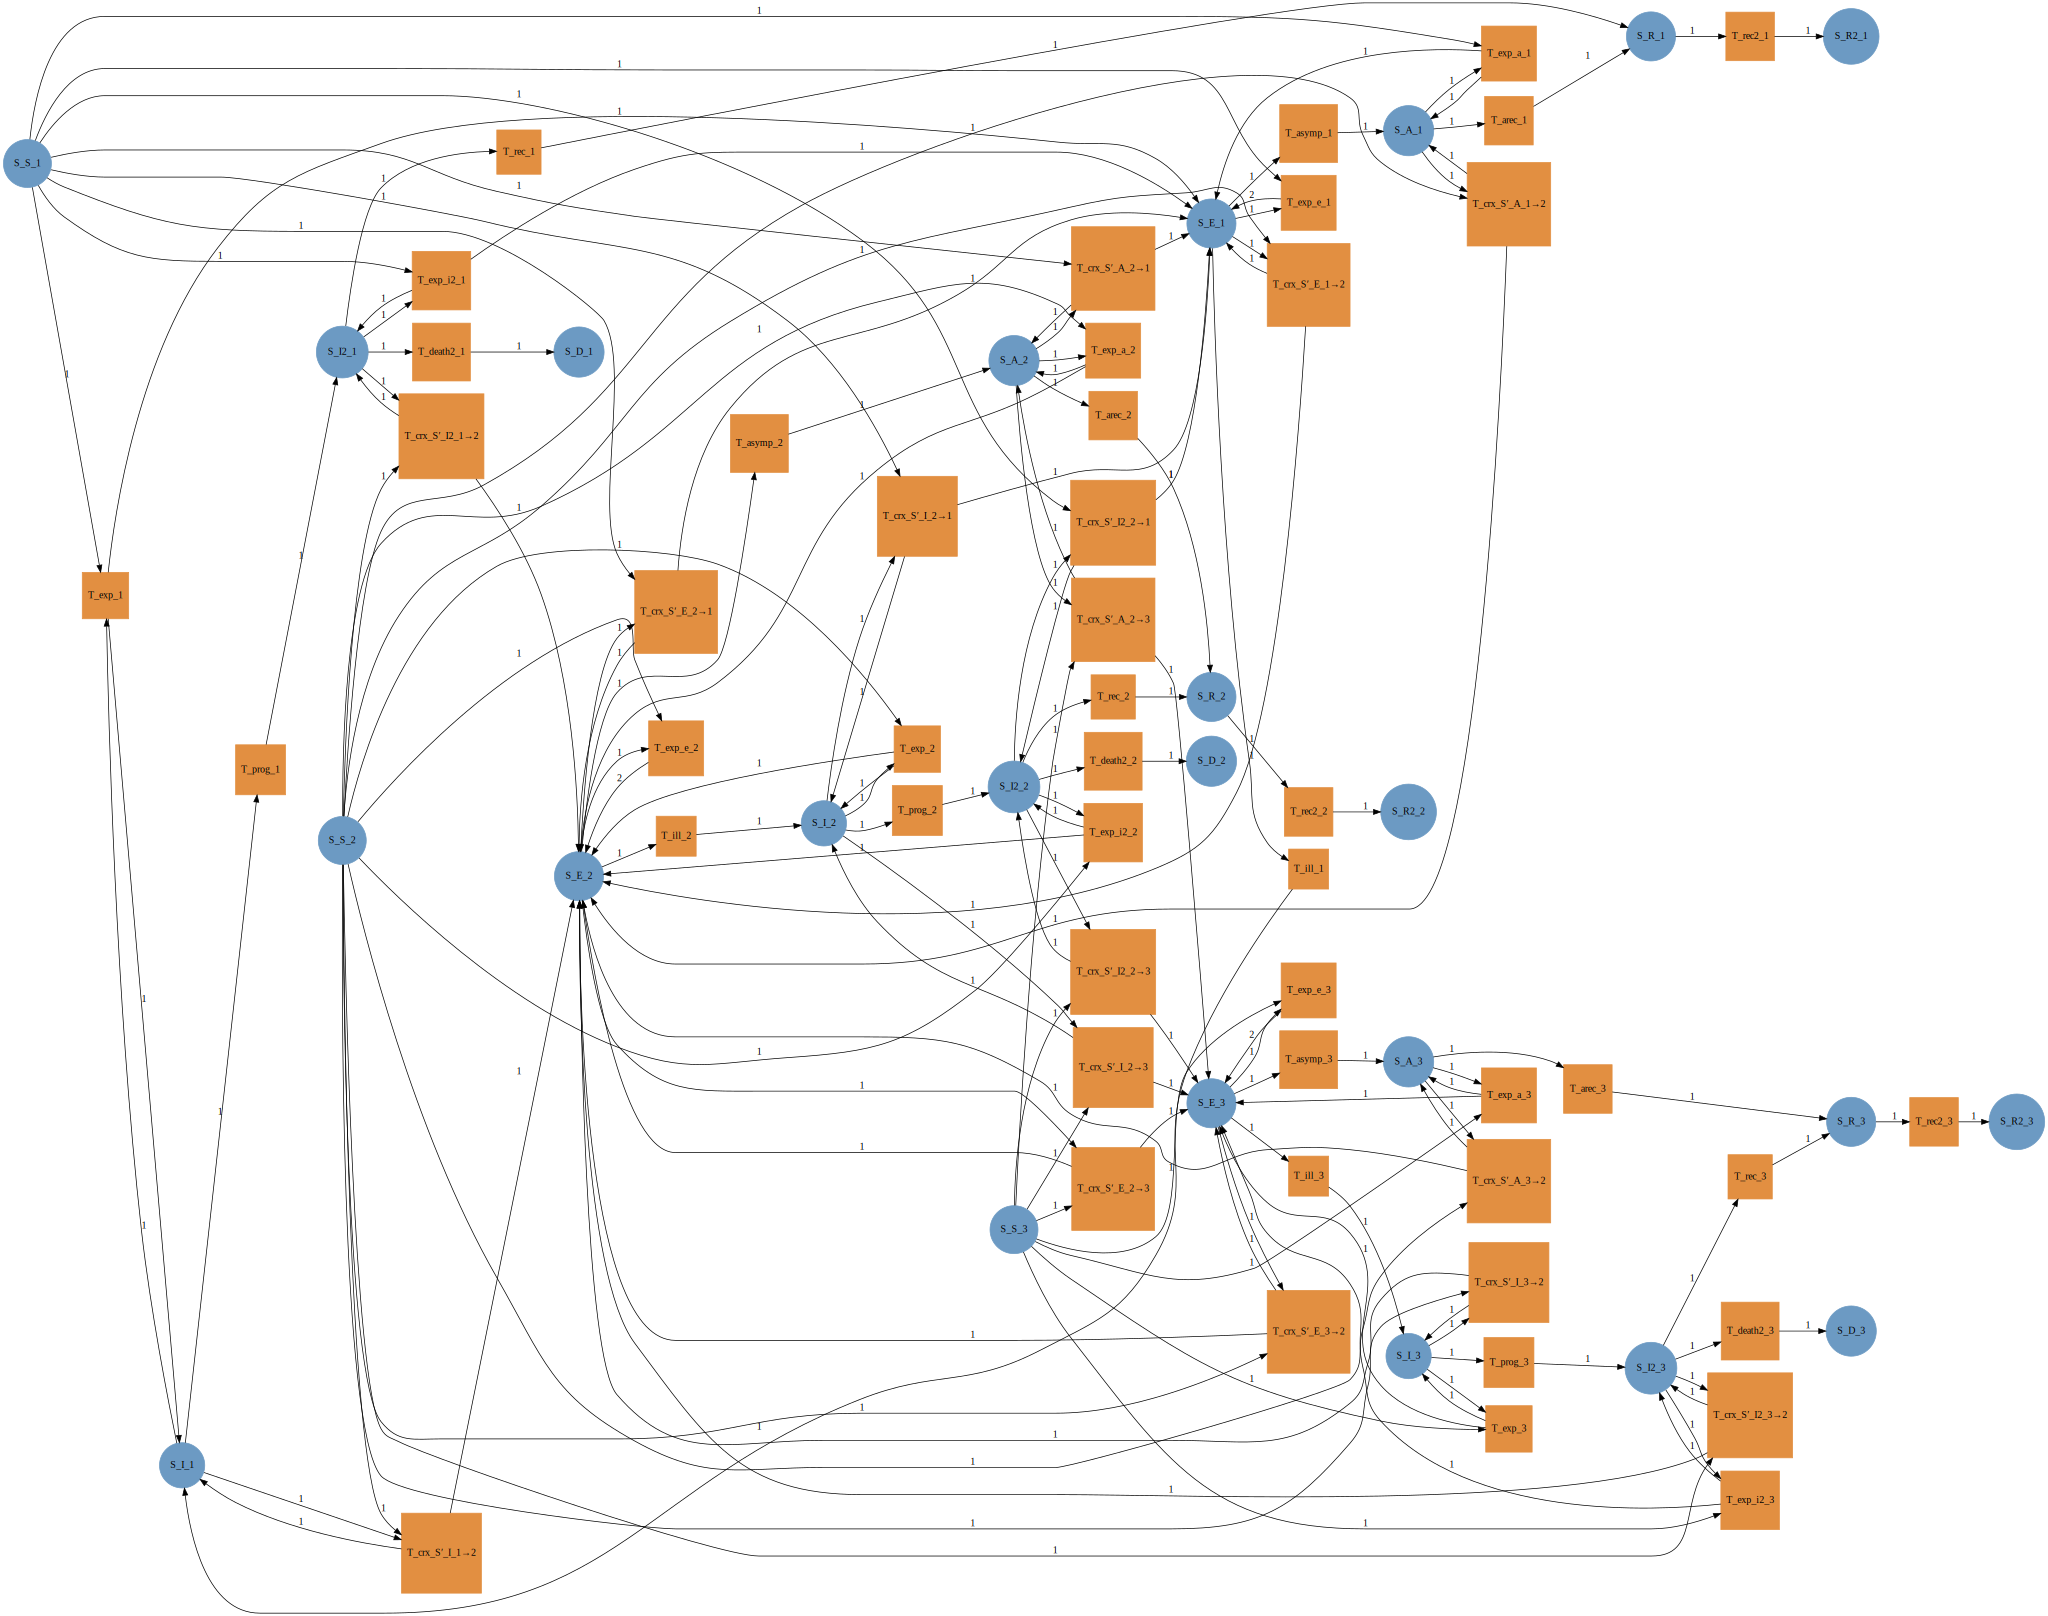

In [4]:
demographic_model = ModelStratify.dem_strat(model, conn_graph, :S, :E, [:E,:A,:I,:I2]);
# Save svg and json files of model
ModelStratify.save_model(demographic_model, "demographic_model");
# Display graph of model
AlgebraicPetri.Graph(demographic_model)

## Perform Spatial Stratification

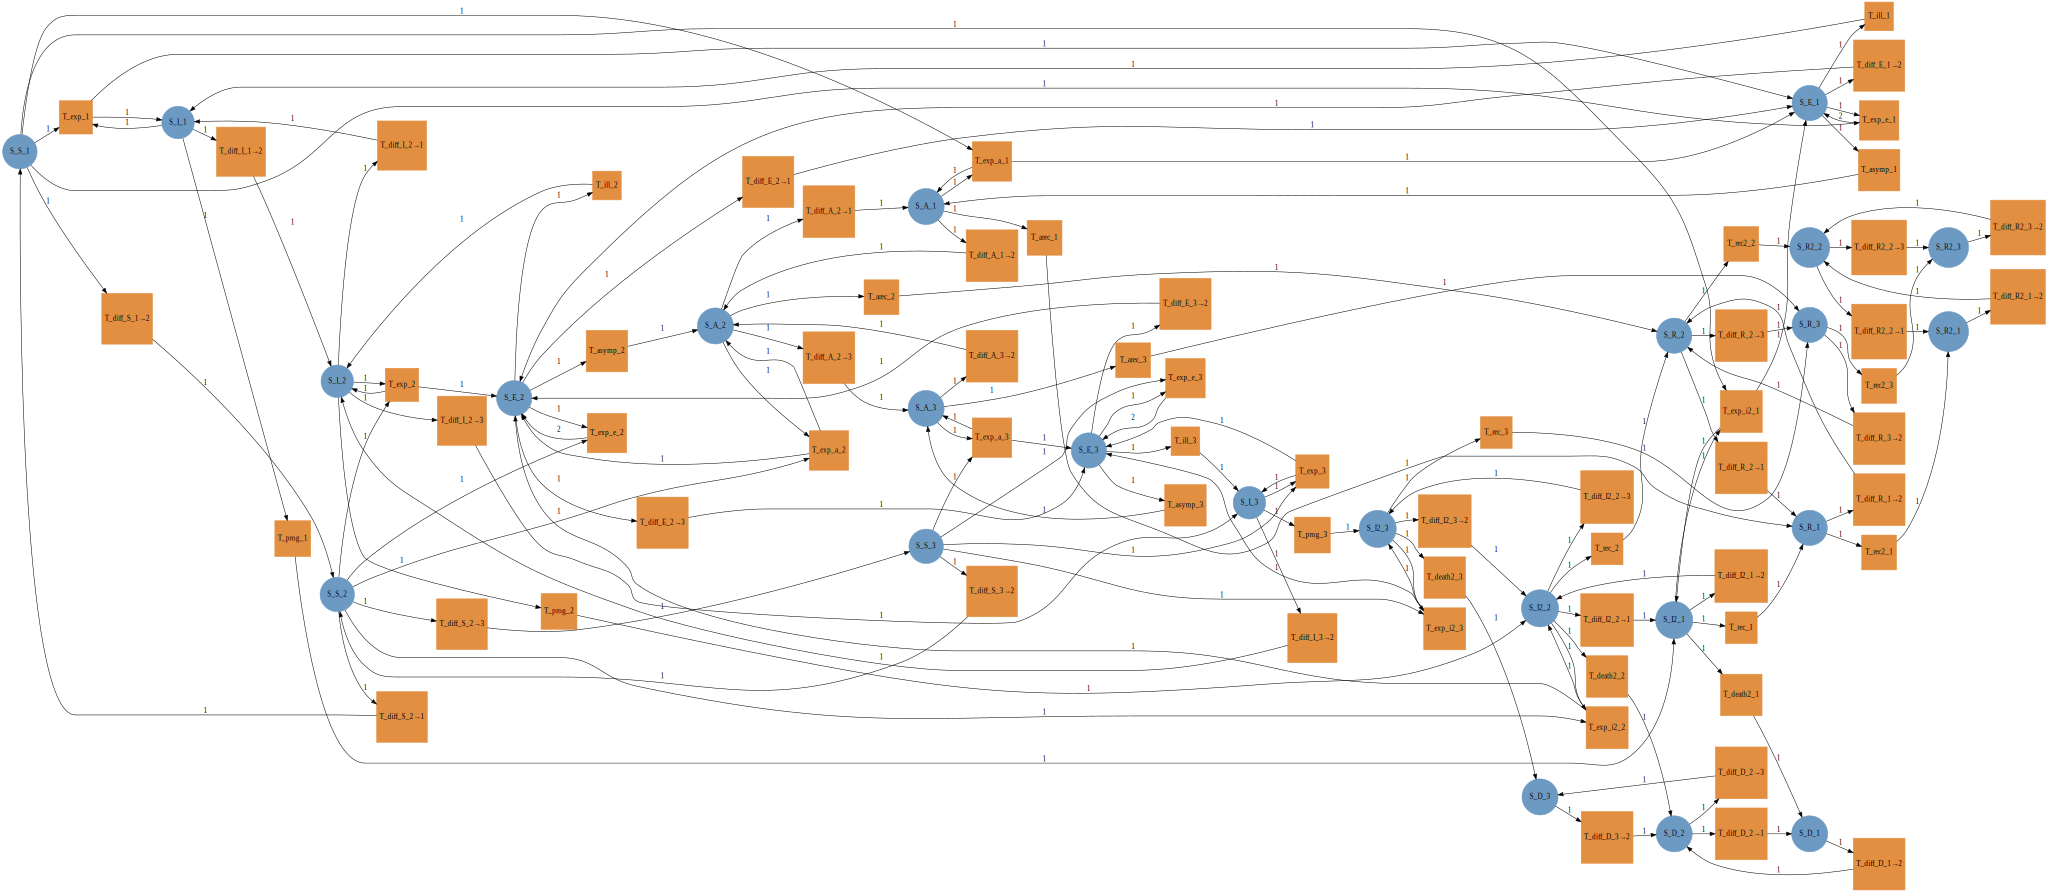

In [5]:
spatial_model = ModelStratify.diff_strat(model, conn_graph);
# Save svg and json files of model
ModelStratify.save_model(spatial_model, "spatial_model");
# Display graph of model
AlgebraicPetri.Graph(spatial_model)